# TP5

1. En un pequeño hotel, los empleados encargados de la cocina quieren preparar el desayuno de los huéspedes del fin de semana. Ellos dividen el trabajo, con la preparación de un artículo por empleado. Se presenta la secuencia de las actividades con la ruta de acceso que representan las tareas para una persona de la siguiente manera:

    a) Especifique el modelo y su objetivo, describiendo entradas, salidas, actividades, eventos y clasificación del modelo.

   Objetivo: Encontrar la secuencia de actividades criticas para la preparación del desayuno de los huespedes para evitar demoras.

   Entradas: tiempo min y max de cada tarea, dependencia entre actividades.

   Salidas: secuencia de actividades criticas.

   Actividades: A, B, C, D, E, F, G.

   Eventos: Inicio de tarea, fin de tarea.

   Clasificacion: discreto, dinamico, estocastico, matematico y formal.
    
    b) 	![Diagrama](a.png)
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
CORRIDAS = 100
EXPERIMENTOS = 30

In [3]:
def simulacionHotel():
    contadores = {
        'inferior': [],
        'medio': [],
        'superior': [],
        'promedioExperimento': [],
        'total':[]
    }

    for e in range(EXPERIMENTOS):
        totalExperimento = []
        for c in range(CORRIDAS):
            tareaA = int(np.random.uniform(2, 4))
            tareaB = int(np.random.uniform(3, 6))
            tareaC = int(np.random.uniform(2, 5))
            tareaD = int(np.random.uniform(3, 6))
            tareaE = int(np.random.uniform(2, 5))
            tareaF = int(np.random.uniform(4, 8))
            tareaG = int(np.random.uniform(3, 7))
            
            accesoSuperior = tareaA + tareaB + tareaC
            accesoMedio = tareaD + tareaE
            accesoInferior = tareaF + tareaG

            contadores['superior'].append(accesoSuperior)
            contadores['medio'].append(accesoMedio)
            contadores['inferior'].append(accesoInferior)

            totalCorrida = accesoSuperior + accesoMedio + accesoInferior
            totalExperimento.append(totalCorrida)
            contadores['total'].append(totalCorrida)

        promedioExperimento = np.mean(totalExperimento)
        contadores['promedioExperimento'].append(promedioExperimento)
       
    return contadores

In [4]:
# La funcion calcual el intervalo de confianza teniendo en cuenta
# El valor del desvio, y el valor de z
# Retorno el limite inferior y superior en una tupla
def calc_intervalo_confianza(muestra, desvio, z):
    n = len(muestra)
    media = np.array(muestra).mean()
    error_estandar = desvio/np.sqrt(n)
    limite_superior = media + z*error_estandar
    limite_inferior = media - z*error_estandar
    return (limite_inferior, limite_superior)

c. 1. El tiempo promedio de finalización del proyecto y el IC. Con el 99% de confiabilidad (2,57).

In [5]:
Z = 2.57
contadores = simulacionHotel()
promedioProyecto = np.mean(contadores['total'])
li, ls = calc_intervalo_confianza(contadores['total'], np.std(contadores['total']), Z) 
print(f'Tiempo promedio de finalizacion del proyecto: {int(promedioProyecto)}')
print(f'Intervalo de confianza: {li:.2f} - {ls:.2f}')

Tiempo promedio de finalizacion del proyecto: 26
Intervalo de confianza: 26.35 - 26.57


2. Calcule el porcentaje de criticidad tienen los diferentes accesos. En el caso del ejercicio 3, evalúe el porcentaje de criticidad de cada tarea.

In [6]:
tiempoTotal = sum(contadores['total'])
tiempoInferior = sum(contadores['inferior'])
tiempoMedio = sum(contadores['medio'])
tiempoSuperior = sum(contadores['superior'])

criticidadInferior = (tiempoInferior/tiempoTotal)*100
criticidadMedio = (tiempoMedio/tiempoTotal)*100
criticidadSuperior = (tiempoSuperior/tiempoTotal)*100

print(f'Porcentaje de criticidad superior: {criticidadSuperior:.2f}%')
print(f'Porcentaje de criticidad medio: {criticidadMedio:.2f}%')
print(f'Porcentaje de criticidad inferior: {criticidadInferior:.2f}%')

Porcentaje de criticidad superior: 35.81%
Porcentaje de criticidad medio: 26.44%
Porcentaje de criticidad inferior: 37.75%


3. Grafique un histograma con la distribución del tiempo de realización del proyecto con los datos de las 3000 corridas. Y otro teniendo en cuenta los promedios de los 30 experimentos.


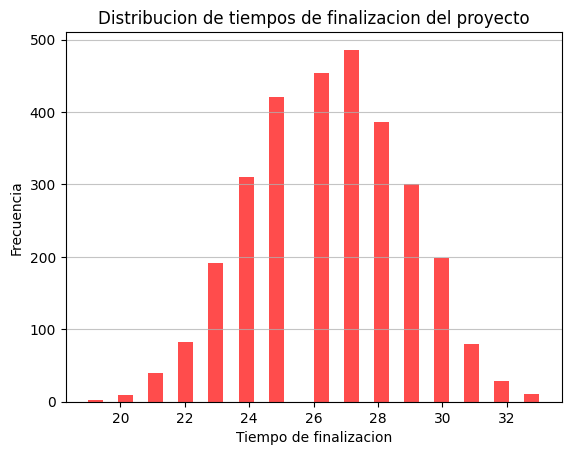

In [9]:
plt.hist(contadores['total'], bins=30, color='red', alpha=0.7)
plt.title('Distribucion de tiempos de finalizacion del proyecto')
plt.xlabel('Tiempo de finalizacion')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

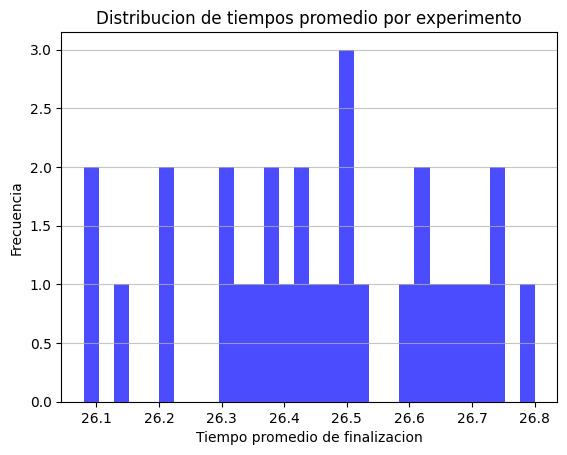

In [15]:
plt.hist(contadores['promedioExperimento'], bins=30, color='blue', alpha=0.7)
plt.title('Distribucion de tiempos promedio por experimento')
plt.xlabel('Tiempo promedio de finalizacion')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
